<a href="https://colab.research.google.com/github/beoharambar/Prodigy-ML-Task2/blob/main/Task_2_%E2%80%93_K_Means_Clustering_(Customer_Segmentation)_using_the_popular_Mall_Customer_Segmentation_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 🔽 Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# 📊 Generating Sample Dataset (Synthetic for Retail Customers)
data = {
    'CustomerID': range(1, 201),
    'Annual Income (k$)': np.random.randint(15, 140, size=200),
    'Spending Score (1-100)': np.random.randint(20, 100, size=200)
}
df = pd.DataFrame(data)

In [3]:
# 📌 Displaying First Few Rows
print("🔍 Sample Data:")
print(df.head())


🔍 Sample Data:
   CustomerID  Annual Income (k$)  Spending Score (1-100)
0           1                  61                      23
1           2                  37                      35
2           3                  80                      57
3           4                  86                      82
4           5                 110                      67


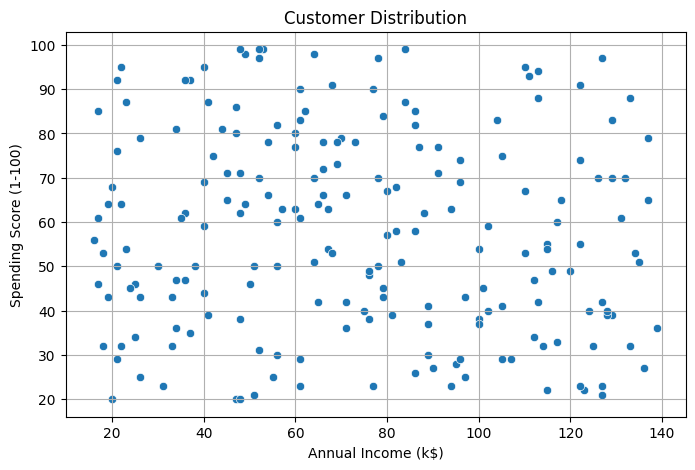

In [4]:
# 📈 Visualizing Initial Data Distribution
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title('Customer Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()

In [5]:
# 🧼 Preprocessing - Selecting Features and Scaling
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# 🔍 Using Elbow Method to Find Optimal Clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

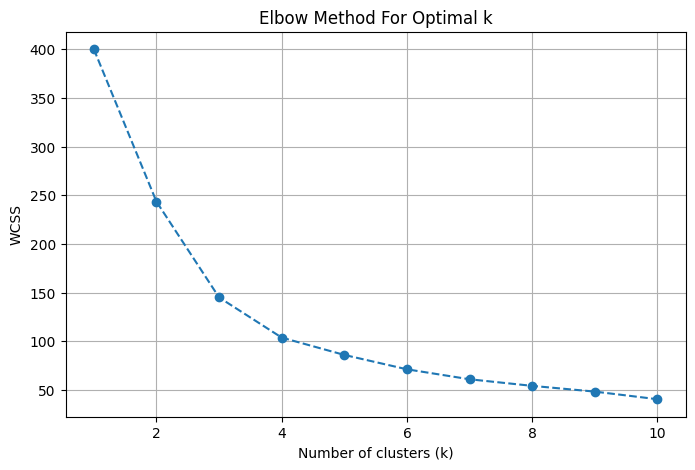

In [7]:
# 📉 Plotting Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [8]:
# ✅ Applying K-Means with Optimal Clusters (k=5)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

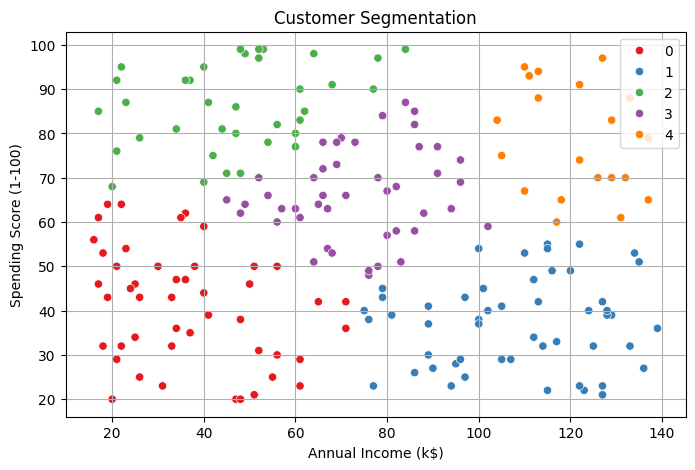

In [9]:
# 🎨 Visualizing the Final Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=df)
plt.title('Customer Segmentation')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# ✅ Display Cluster Counts
print("\n📊 Customer Count in Each Cluster:")
print(df['Cluster'].value_counts())


📊 Customer Count in Each Cluster:
Cluster
1    51
0    48
3    45
2    36
4    20
Name: count, dtype: int64
